In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
def train_model(df,value):
    split =int(.8*len(df))
    
    pca = PCA(n_components=0.95)
    pca.fit(df)
    df_trans=pca.transform(df)
    
    data_use=scale(df)

    X_train = data_use[:split]
    X_test = data_use[split:]
    y_train = value[:split].values.reshape((-1, 1))
    y_test = value[split:].values.reshape((-1, 1))

    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    grid = GridSearchCV(SVC(), param_grid={"C":[0.01,0.1, 1, 10,100], "gamma": [100,10,1,0.1,0.01]}, cv=4)
    grid.fit(X_train, y_train)
    print("The best parameters are %s with a score of %0.2f"
          % (grid.best_params_, grid.best_score_))
    
    correct=0
    L=len(data_use)
    train=split
    total_predict_data=L-train

    while train<L:
        Data_predict = data_use[train:train+1]
        value_real = value[train:train+1]
        classifier= SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'], kernel='rbf')
        classifier.fit(X_train,y_train)
        value_predict=classifier.predict(Data_predict)

        if(value_real[0]==int(value_predict)):
            correct=correct+1
        train = train+1

    correct=correct/total_predict_data*100
    print("Correct = ",correct,"%")
    
    pred=classifier.predict(data_use)
    
    return pred

In [3]:
data_input = pd.read_csv('data_input.csv',
                   delimiter=',',
                   converters={'Stkcd':str})
data_input=data_input.set_index(['Stkcd','Trddt'])

In [4]:
Ticker='002415'
start_time1='2017/1/3'
end_time1='2017/12/29'
start_time2='2018/1/2'
end_time2='2018/12/28'
data_input.loc[Ticker].head()

,Opnprc,Hiprc,Loprc,Clsprc,Dsmvosd
Trddt,,,,,
2017/1/3,23.95,24.39,23.78,24.24,113559087.9
2017/1/4,24.20,24.31,24.01,24.16,113184305.4
2017/1/5,24.16,24.35,23.78,24.30,116055075.1
2017/1/6,24.32,24.44,24.02,24.10,115099889.3
2017/1/9,23.91,24.51,23.85,24.26,116603280.2


No handles with labels found to put in legend.


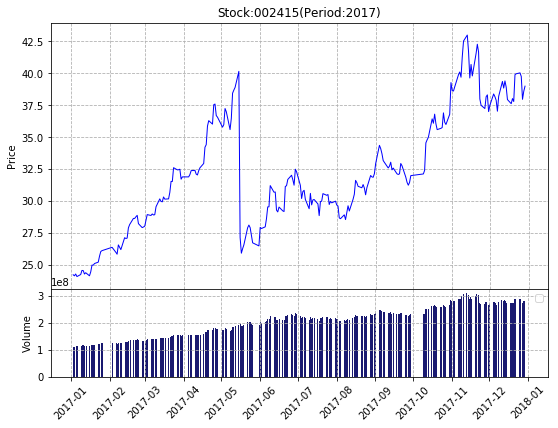

In [23]:
import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates

price1=data_input.loc[Ticker][start_time1:end_time1]['Clsprc'].values
vol1=data_input.loc[Ticker][start_time1:end_time1]['Dsmvosd'].values
dates1=data_input.loc[Ticker][start_time1:end_time1]['Clsprc'].index.values
dates1=pd.DatetimeIndex(dates1)

fig = plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((4,20),(0,0),rowspan=3,colspan=9)
ax1.set_title('Stock:002415(Period:2017)')
ax1.set_ylabel("Price")
ax1.plot(dates1,price1,color='blue',linewidth=1.0)
plt.grid(ls="--")

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax2 = plt.subplot2grid((4,20),(3,0),colspan=9)
ax2.bar(dates1,vol1,color='midnightblue')
ax2.set_ylabel("Volume")
plt.grid(ls="--")

ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    
plt.subplots_adjust(bottom=0.13,top=0.95,hspace=0)
plt.legend(loc='best')
plt.grid(ls="--")

plt.show()

No handles with labels found to put in legend.


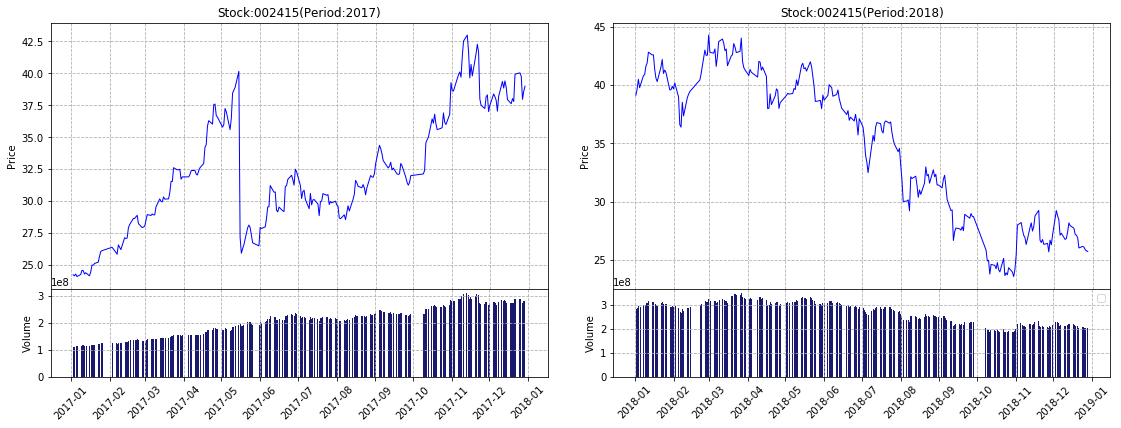

In [18]:

import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates

price1=data_input.loc[Ticker][start_time1:end_time1]['Clsprc'].values
vol1=data_input.loc[Ticker][start_time1:end_time1]['Dsmvosd'].values
dates1=data_input.loc[Ticker][start_time1:end_time1]['Clsprc'].index.values
dates1=pd.DatetimeIndex(dates1)

price2=data_input.loc[Ticker][start_time2:end_time2]['Clsprc'].values
vol2=data_input.loc[Ticker][start_time2:end_time2]['Dsmvosd'].values
dates2=data_input.loc[Ticker][start_time2:end_time2]['Clsprc'].index.values
dates2=pd.DatetimeIndex(dates2)

fig = plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((4,20),(0,0),rowspan=3,colspan=9)
ax1.set_title('Stock:002415(Period:2017)')
ax1.set_ylabel("Price")
ax1.plot(dates1,price1,color='blue',linewidth=1.0)
plt.grid(ls="--")

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax2 = plt.subplot2grid((4,20),(3,0),colspan=9)
ax2.bar(dates1,vol1,color='midnightblue')
ax2.set_ylabel("Volume")
plt.grid(ls="--")

ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax3 = plt.subplot2grid((4,20),(0,10),rowspan=3,colspan=9)
ax3.set_title("Stock:002415(Period:2018)")
ax3.set_ylabel("Price")
ax3.plot(dates2,price2,color='blue',linewidth=1.0)
plt.grid(ls="--")

ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax4 = plt.subplot2grid((4,20),(3,10),colspan=9)
ax4.bar(dates2,vol2,color='midnightblue')
ax4.set_ylabel("Volume")

ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(45)
    
    
plt.subplots_adjust(bottom=0.13,top=0.95,hspace=0)
plt.legend(loc='best')
plt.grid(ls="--")

plt.show()

No handles with labels found to put in legend.


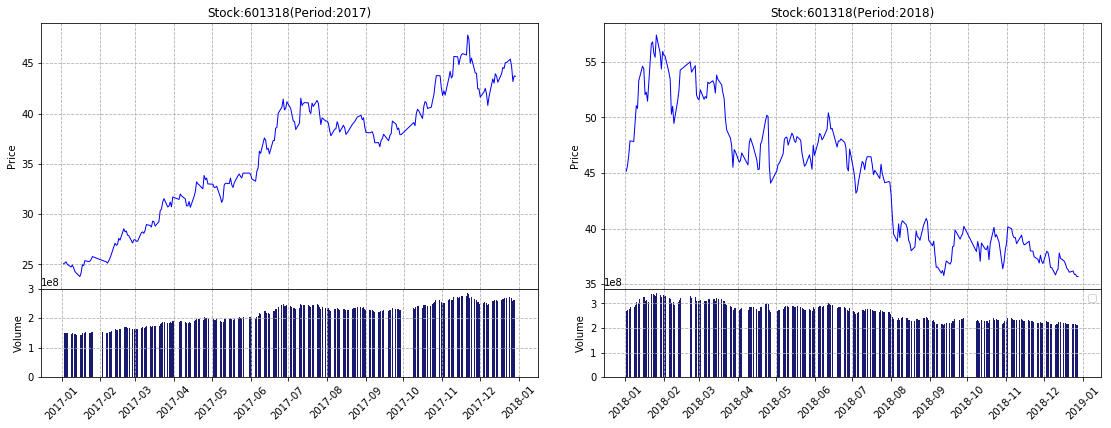

In [240]:
import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.dates as mdates

price1=data_input.loc[Ticker][start_time1:end_time1]['Clsprc'].values
vol1=data_input.loc[Ticker][start_time1:end_time1]['Dsmvosd'].values
dates1=data_input.loc[Ticker][start_time1:end_time1]['Clsprc'].index.values
dates1=pd.DatetimeIndex(dates1)

price2=data_input.loc[Ticker][start_time2:end_time2]['Clsprc'].values
vol2=data_input.loc[Ticker][start_time2:end_time2]['Dsmvosd'].values
dates2=data_input.loc[Ticker][start_time2:end_time2]['Clsprc'].index.values
dates2=pd.DatetimeIndex(dates2)

fig = plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((4,20),(0,0),rowspan=3,colspan=9)
ax1.set_title('Stock:002415(Period:2017)')
ax1.set_ylabel("Price")
ax1.plot(dates1,price1,color='blue',linewidth=1.0)
plt.grid(ls="--")

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax2 = plt.subplot2grid((4,20),(3,0),colspan=9)
ax2.bar(dates1,vol1,color='midnightblue')
ax2.set_ylabel("Volume")
plt.grid(ls="--")

ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax3 = plt.subplot2grid((4,20),(0,10),rowspan=3,colspan=9)
ax3.set_title("Stock:002415(Period:2018)")
ax3.set_ylabel("Price")
ax3.plot(dates2,price2,color='blue',linewidth=1.0)
plt.grid(ls="--")

ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax4 = plt.subplot2grid((4,20),(3,10),colspan=9)
ax4.bar(dates2,vol2,color='midnightblue')
ax4.set_ylabel("Volume")

ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(45)
    
    
plt.subplots_adjust(bottom=0.13,top=0.95,hspace=0)
plt.legend(loc='best')
plt.grid(ls="--")

plt.show()

In [241]:
n = 10
data_input1=data_input.loc[Ticker][start_time1:end_time1]
data_input2=data_input.loc[Ticker][start_time2:end_time2]

data=pd.DataFrame(index=data_input1.index)

#shift to yesterday
data['Open']=data_input1['Opnprc'].shift(1)
data['High']=data_input1['Hiprc'].shift(1)
data['Low']=data_input1['Loprc'].shift(1)
data['Close']=data_input1['Clsprc'].shift(1)
data['volume']=data_input1['Dsmvosd'].shift(1)

data['High-Low'] = data['High']-data['Low']
data['Close-YClose']=data['Close']-data['Close'].shift(1)

close = [float(x) for x in data['Close']]
high = [float(x) for x in data['High']]
low = [float(x) for x in data['Low']]

data['MA']=ta.MA(np.array(data['Close']), timeperiod=n) 
data['RSI']=ta.RSI(np.array(close), timeperiod=n)
data['SMA']= data['Close'].rolling(window=n).mean()
data['SAR']=ta.SAR(np.array(high),np.array(low),0.2,0.2)
data['ADX']=ta.ADX(np.array(high),np.array(low),np.array(close), timeperiod =n)
data['MOM']=ta.MOM(np.array(close), timeperiod=n)
data['ROC']=ta.ROC(np.array(close), timeperiod=n)
data['AD']=ta.AD(np.array(high), np.array(low), np.array(close), np.array(data['volume']))
data['Return']= np.log(data['Close']/data['Close'].shift(1))
data.head()

,Open,High,Low,Close,volume,High-Low,Close-YClose,MA,RSI,SMA,SAR,ADX,MOM,ROC,Return
Trddt,,,,,,,,,,,,,,,
2017/1/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/1/4,24.70,25.24,24.70,25.06,149623295.6,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017/1/5,25.09,25.23,24.88,25.14,150100943.8,0.35,0.08,NaN,NaN,NaN,24.700,NaN,NaN,NaN,0.003187
2017/1/6,25.19,25.38,25.09,25.26,150817416.1,0.29,0.12,NaN,NaN,NaN,24.806,NaN,NaN,NaN,0.004762
2017/1/9,25.20,25.21,24.85,25.00,149265059.5,0.36,-0.26,NaN,NaN,NaN,25.380,NaN,NaN,NaN,-0.010346


In [253]:
n = 10

data2=pd.DataFrame(index=data_input2.index)

#shift to yesterday
data2['Open']=data_input2['Hiprc'].shift(1)
data2['High']=data_input2['Hiprc'].shift(1)
data2['Low']=data_input2['Loprc'].shift(1)
data2['Close']=data_input2['Clsprc'].shift(1)
data2['volume']=data_input2['Dsmvosd'].shift(1)

data2['High-Low'] = data2['High']-data2['Low']
data2['Close-YClose']=data2['Close']-data2['Close'].shift(1)

close = [float(x) for x in data2['Close']]
high = [float(x) for x in data2['High']]
low = [float(x) for x in data2['Low']]

data2['RSI']=ta.RSI(np.array(close), timeperiod=n)
data2['SMA']= data2['Close'].rolling(window=n).mean()
data2['SAR']=ta.SAR(np.array(high),np.array(low),0.2,0.2)
data2['ADX']=ta.ADX(np.array(high),np.array(low),np.array(close), timeperiod =n)
data2['MOM']=ta.MOM(np.array(close), timeperiod=n)
data2['ROC']=ta.ROC(np.array(close), timeperiod=n)
data2['AD']=ta.AD(np.array(high), np.array(low), np.array(close), np.array(data2['volume']))
data2['Return']= np.log(data2['Close']/data2['Close'].shift(1))
data2.head()

,Open,High,Low,Close,High-Low,Close-YClose,MA,RSI,SMA,SAR,ADX,MOM,ROC,Return
Trddt,,,,,,,,,,,,,,
2018/1/2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/1/3,45.20,45.20,44.18,45.15,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/1/4,46.46,46.46,45.20,45.65,1.26,0.50,NaN,NaN,NaN,44.1800,NaN,NaN,NaN,0.011013
2018/1/5,46.58,46.58,45.73,46.58,0.85,0.93,NaN,NaN,NaN,44.6360,NaN,NaN,NaN,0.020168
2018/1/8,47.95,47.95,46.31,47.88,1.64,1.30,NaN,NaN,NaN,45.0248,NaN,NaN,NaN,0.027527


In [254]:
value1 = data["Close-YClose"].shift(-1)
value1 = value1.bfill()
value1[value1>0]=1
value1[value1==0]=0
value1[value1<0]=-1
data=data.dropna(how='any')
data.head()

,Open,High,Low,Close,volume,High-Low,Close-YClose,MA,RSI,SMA,SAR,ADX,MOM,ROC,Return
Trddt,,,,,,,,,,,,,,,
2017/2/7,25.38,25.54,25.15,25.26,150817416.1,0.39,-0.13,25.191,51.351310,25.191,25.9400,20.052317,1.47,6.179067,-0.005133
2017/2/8,25.23,25.23,24.99,25.13,150041237.8,0.24,-0.13,25.287,48.544898,25.287,25.7820,18.355870,0.96,3.971866,-0.005160
2017/2/9,25.17,25.45,25.09,25.35,151354770.3,0.36,0.22,25.326,53.339836,25.326,25.6236,17.766832,0.39,1.562500,0.008716
2017/2/10,25.40,25.80,25.40,25.62,152966833.0,0.40,0.27,25.400,58.600582,25.400,24.9900,18.515262,0.74,2.974277,0.010595
2017/2/13,25.70,26.18,25.61,25.97,155056543.8,0.57,0.35,25.460,64.384267,25.460,25.0900,20.308644,0.60,2.364998,0.013569


In [255]:
value2 = data2["Close-YClose"].shift(-1)
value2 = value2.bfill()
value2[value2>0]=1
value2[value2==0]=0
value2[value2<0]=-1
data2=data2.dropna(how='any')
data2.head()

,Open,High,Low,Close,High-Low,Close-YClose,MA,RSI,SMA,SAR,ADX,MOM,ROC,Return
Trddt,,,,,,,,,,,,,,
2018/1/30,58.07,58.07,55.00,55.78,3.07,-1.62,54.786,67.285461,54.786,54.3000,66.687638,1.18,2.161172,-0.028629
2018/1/31,55.50,55.50,54.25,54.35,1.25,-1.43,54.784,60.032081,54.784,58.7000,64.943723,-0.02,-0.036785,-0.025971
2018/2/1,56.56,56.56,53.88,55.94,2.68,1.59,55.174,64.729405,55.174,58.0700,63.916747,3.90,7.494235,0.028835
2018/2/2,56.36,56.36,54.05,55.58,2.31,-0.36,55.506,62.870535,55.506,57.2320,62.992469,3.32,6.352851,-0.006456
2018/2/5,55.88,55.88,54.20,55.49,1.68,-0.09,55.910,62.372980,55.910,56.5616,62.160618,4.04,7.852284,-0.001621


In [256]:
pred1=train_model(data,value1)

(178, 15)
(178, 1)
(45, 15)
(45, 1)
The best parameters are {'C': 1, 'gamma': 0.1} with a score of 0.54
Correct =  46.666666666666664 %


In [257]:
pred2=train_model(data2,value2)

(178, 14)
(178, 1)
(45, 14)
(65, 1)
The best parameters are {'C': 0.01, 'gamma': 100} with a score of 0.56
Correct =  55.55555555555556 %


In [258]:
signals=pd.DataFrame(index=data.index)

signals['signal'] = 0.0
signals['signal'] = pred1
signals['signal']= signals['signal'].shift(1)
signals['ground_truth']=value2
signals['data']=data_input1["2017/2/7":"2017/12/29"]['Clsprc']
# signals['data']=data_input2["2018/1/30":"2018/12/28"]['Clsprc']

signals['signal'] = signals['signal'].bfill()
signals=signals.dropna()

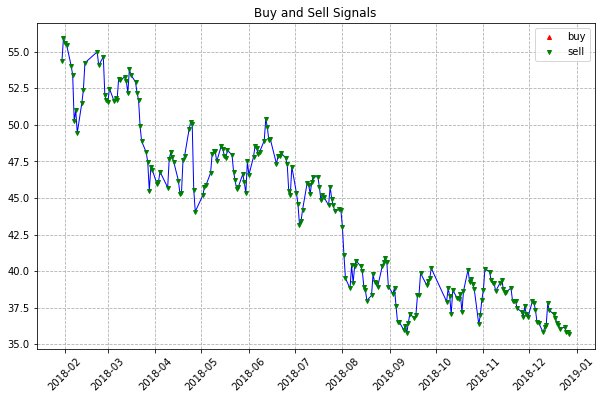

In [259]:
dates=pd.DatetimeIndex(signals['data'].index.values)

fig,ax1 =plt.subplots(figsize=(10,6))
ax1.plot(dates,signals['data'].values,color='b',lw=1.0)

y=signals[signals['signal']==1.0]['data'].values
x=pd.DatetimeIndex(signals[signals['signal']==1.0]['data'].index.values)
ax1.plot(x,y,'^', markersize=4, color='red',label='buy')
y=signals[signals['signal']==-1.0]['data'].values
x=pd.DatetimeIndex(signals[signals['signal']==-1.0]['data'].index.values)
ax1.plot(x,y,'v', markersize=4, color='green',label='sell')


ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# Show the plot
plt.legend(loc='best')
plt.title('Buy and Sell Signals')
plt.grid(ls="--")
    
plt.show()

In [260]:
df=pd.DataFrame(index=data.index)
df['return'] = data_input[start_time1:end_time1]['Clsprc'].pct_change()
df['return'] = data_input2[start_time2:end_time2]['Clsprc'].pct_change()
df['strategy'] = signals['signal']*df['return'].shift(-1)
df['return_cum'] = (df['return'] + 1).cumprod()
df['strategy_cum'] = (df['strategy'] + 1).cumprod()
df=df.dropna()

In [261]:
def ratio(df):
    return_year=df.mean()*252
    volatility=df.std()*252**0.5
    strategy_cum=(df+1).cumprod()
    drawdown=(strategy_cum.cummax()-strategy_cum).max()
    sharpe_ratio = np.sqrt(252) * (df.mean() / df.std()) 
    res = pd.DataFrame([return_year, volatility, drawdown, sharpe_ratio],\
                       columns=[df.name],index=['return', 'volatility', 'drawdown','sharpe ratio'])
    return res
ratio(df['return']).join(ratio(df['strategy']))

,return,strategy
return,-0.445984,0.416565
volatility,0.348479,0.347548
drawdown,0.363213,0.182172
sharpe ratio,-1.279802,1.198584


In [262]:
df['Market Return'] = df['return']
df['Strategy Return'] = df['strategy']

Text(0.5,1,'Backtest')

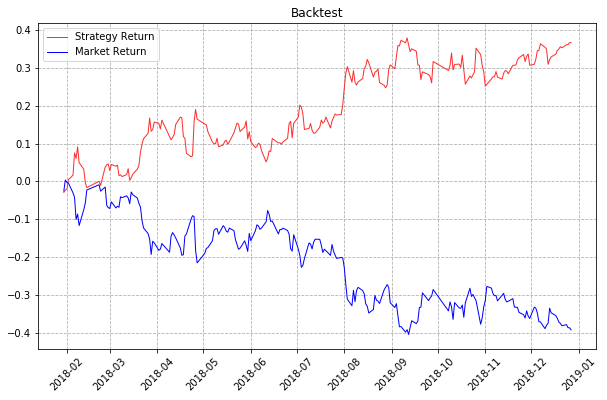

In [263]:
fig,ax1 =plt.subplots(figsize=(10,6))
dates=pd.DatetimeIndex(df.index.values)

ax1.plot(dates,df['Strategy Return'].cumsum(),color='#FF2D2D',lw=1.0)
ax1.plot(dates,df['Market Return'].cumsum(),color='b',lw=1.0)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
plt.legend(loc='best')
plt.grid(ls="--")
plt.title('Backtest')